In [1]:
#Importing the dataset
import pandas as pd
car_price=pd.read_csv('cars_data.csv')
car_price.head()

Make           Model   Type Origin DriveTrain     MSRP  EngineSize   
0  Acura             MDX    SUV   Asia        All  $36,945         3.5  \
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

### Understanding data

In [2]:
car_price.shape

(428, 14)

In [3]:
car_price.columns 
#Columns present in the dataset

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [4]:
#Searching for null values and removing them
car_price.isnull().sum()
car_price=car_price.dropna()

In [5]:
car_price.dtypes #Let's see what are the datatypes of each column

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

### Preprocessing data

In [6]:
# $ symbol is the major obstacle in preducting value hence we need to remove it
car_price["MSRP"].head(2)

0    $36,945
1    $23,820
Name: MSRP, dtype: object

In [7]:
car_price["MSRP"] = car_price["MSRP"].str.replace("$", "")
car_price["MSRP"] = car_price["MSRP"].str.replace(",", "") #Here ',' shouldn't be included in a number(int)
car_price["MSRP"] = car_price["MSRP"].astype("int") #Here we need to covert the datatype "object" into "int" for prediction purposes

In [8]:
car_price["MSRP"].head(2)

0    36945
1    23820
Name: MSRP, dtype: int32

In [9]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

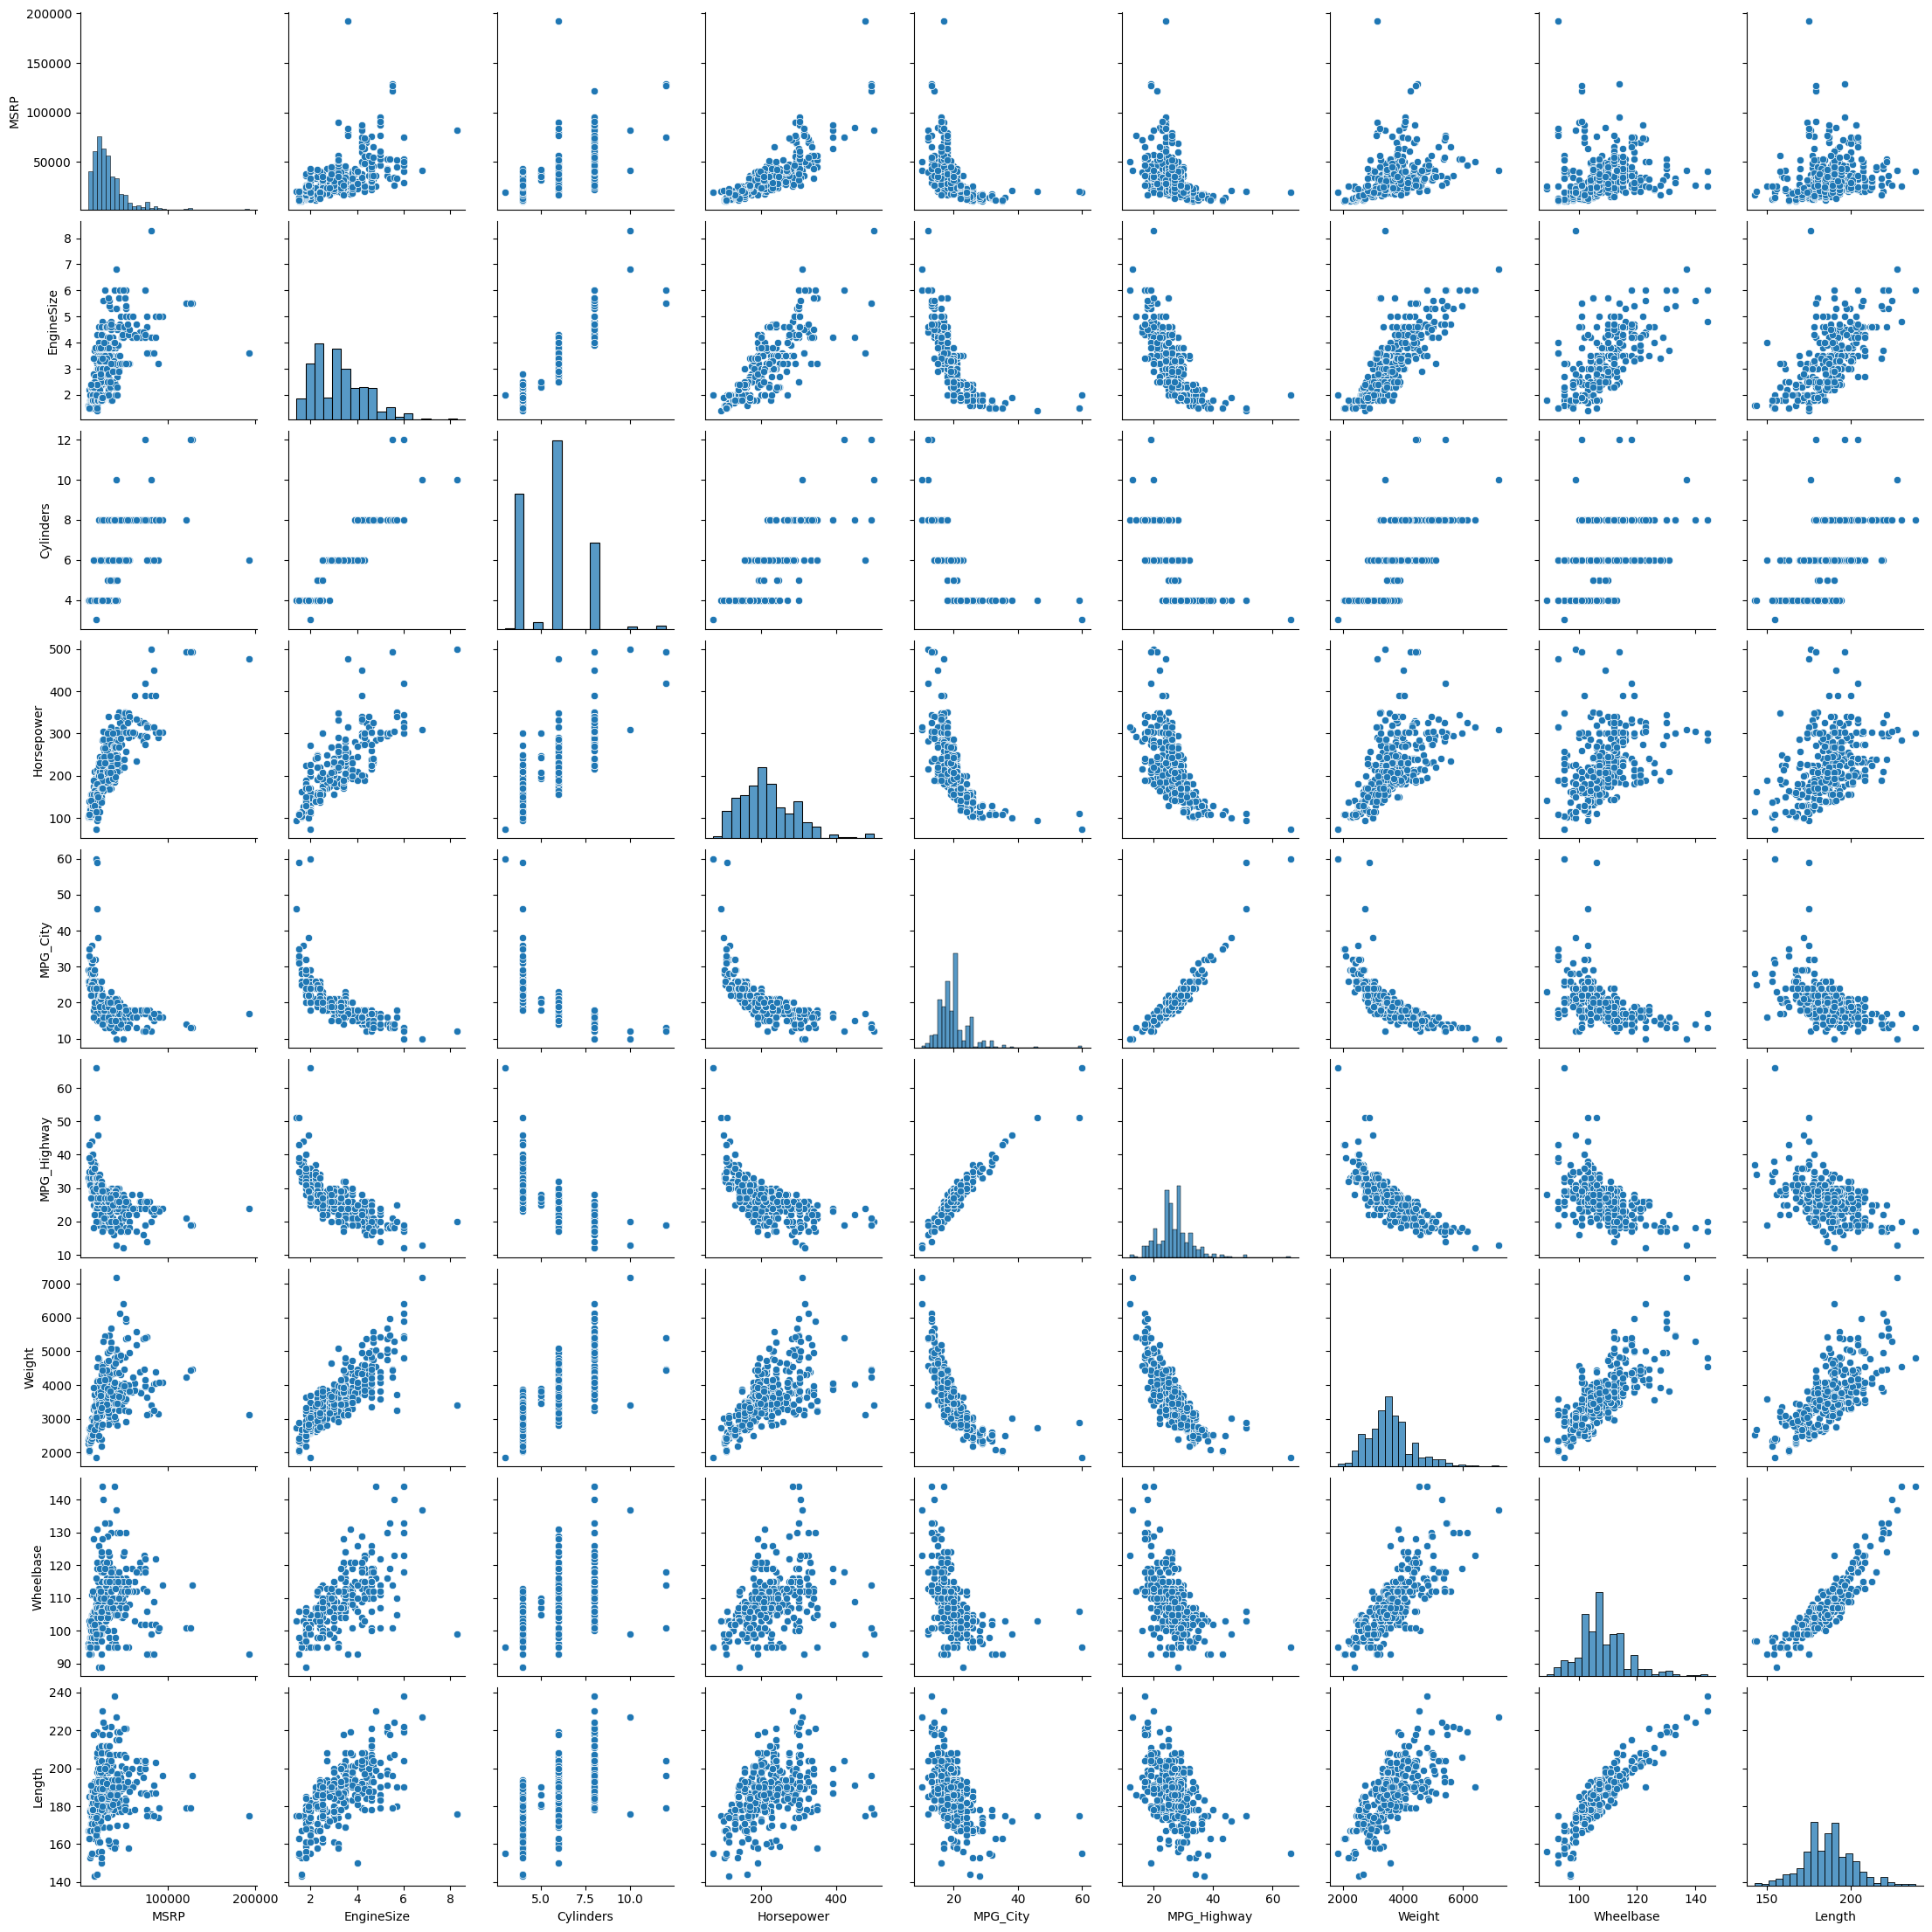

In [10]:
sns.pairplot(car_price)

In [11]:
car_price.Make.unique() #Categorical column should be further preprocessed

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [12]:
fig = px.histogram(car_price, x="Make",
                  labels = {"Make": "Manufacturer"},
                  title= "Manufacturer of the car",
                  color_discrete_sequence=["red"])

fig.show()
#This is the countplot of each manufacturer of the car

In [13]:
fig = px.histogram(car_price, x="Origin",
                  labels = {"Origin": "Origin of car"},
                  title= "Origin of the car",
                  color_discrete_sequence=["blue"])

fig.show()
#Location based countplot which country produces more car

In [14]:
#Categorical columns are to be divided into dummy columns for easy analysis purposes
car_price_new = pd.get_dummies(car_price, columns= ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'],dtype=int)

In [15]:
car_price_new.head()

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight   
0  36945         3.5        6.0         265        17           23    4451  \
1  23820         2.0        4.0         200        24           31    2778   
2  26990         2.4        4.0         200        22           29    3230   
3  33195         3.2        6.0         270        20           28    3575   
4  43755         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck   
0        106     189           1  ...           0            0           0  \
1        101     172           1  ...           1            0           0   
2        105     183           1  ...           1            0           0   
3        108     186           1  ...           1            0           0   
4        115     197           1  ...           1            0           0   

   Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All   
0           0            1              0           0               1  \
1           0            1              0           0               0   
2           0            1              0           0               0   
3           0            1              0           0               0   
4           0            1              0           0               0   

   DriveTrain_Front  DriveTrain_Rear  
0                 0                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 482 columns]

In [16]:
car_price_new.shape

(426, 482)

In [17]:
#Now we need to get the input & output variables to be defined
X = car_price_new.drop("MSRP", axis=1)
y = car_price_new["MSRP"]

In [18]:
X

EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight   
0           3.5        6.0         265        17           23    4451  \
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  Make_Acura  Make_Audi  ...  Type_Sedan  Type_Sports   
0          106     189           1          0  ...           0            0  \
1          101     172           1          0  ...           1            0   
2          105     183           1          0  ...           1            0   
3          108     186           1          0  ...           1            0   
4          115     197           1          0  ...           1            0   
..         ...     ...         ...        ...  ...         ...          ...   
423        105     186           0          0  ...           1            0   
424        105     186           0          0  ...           1            0   
425        110     190           0          0  ...           1            0   
426        101     180           0          0  ...           0            0   
427        109     186           0          0  ...           0            0   

     Type_Truck  Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA   
0             0           0            1              0           0  \
1             0           0            1              0           0   
2             0           0            1              0           0   
3             0           0            1              0           0   
4             0           0            1              0           0   
..          ...         ...          ...            ...         ...   
423           0           0            0              1           0   
424           0           0            0              1           0   
425           0           0            0              1           0   
426           0           1            0              1           0   
427           0           1            0              1           0   

     DriveTrain_All  DriveTrain_Front  DriveTrain_Rear  
0                 1                 0                0  
1                 0                 1                0  
2                 0                 1                0  
3                 0                 1                0  
4                 0                 1                0  
..              ...               ...              ...  
423               0                 1                0  
424               0                 1                0  
425               0                 1                0  
426               0                 1                0  
427               1                 0                0  

[426 rows x 481 columns]

In [19]:
y

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int32

In [20]:
#Converting the i/p & o/p variables to array
X = np.array(X)
y= np.array(y)

In [21]:
np.isnan(X).sum()


0

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.8395813532870713

In [24]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.6911340675804636

In [25]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.7816533599534683

In [26]:
#We are getting more accuracy on linear regression model hence let's predict now
pred=linear_model.predict(X_test)

In [27]:
pred

array([ 64696.88768286,  41455.79568848,  30991.90280197,  32345.31019163,
        65139.01752192,  12615.16943018,  27551.18811331,  38565.96549756,
        12633.23308567,  20198.21132804,  33493.13168502,  25986.11963617,
        29297.22412201,  35409.76453582,  15244.52023339,  54423.99059077,
        21349.58027943,  22101.35206587,  41865.39124781,  14536.5788743 ,
        35756.50924829,  29732.5640947 ,  15567.33856973,  82641.68904849,
        49735.23964786,  36096.39873166,  37895.14736315,  19391.36880979,
        21631.33215388,  20858.18950617,  31089.02003606,  57493.51588487,
        34234.41640961,  13496.0962418 , 105040.50059605,  29187.31128953,
        30661.4961137 ,  26842.87331957,  19926.71057833,  30393.19275558,
        17270.8516075 ,  33387.99499952,  14730.68375548,  19391.36880979,
        10957.66511422,  77708.29078124,  33845.27487507,  16096.42464967,
        14880.13330017,  18950.76206067,  15755.36889776,  46333.40816019,
        25873.29025359,  